In [1]:
from scipy import stats

In [2]:
from gradients import *

In [5]:
df = pd.read_csv('subjects_gradients_ecc.csv')

In [6]:
df

,roi,value,subj,epic,indic
0,0,-0.774317,1,baseline,grad1
1,1,-1.407623,1,baseline,grad1
2,2,-1.905399,1,baseline,grad1
3,3,-1.225759,1,baseline,grad1
4,4,-0.971639,1,baseline,grad1
...,...,...,...,...,...
598795,993,1.497172,46,late,ecc
598796,994,2.645587,46,late,ecc
598797,995,0.922904,46,late,ecc
598798,996,2.302812,46,late,ecc


In [7]:
df.shape[0] / 998 / 40 / 5 / 3

1.0

In [8]:
df.indic.unique()

array(['grad1', 'grad2', 'grad3', 'grad4', 'ecc'], dtype=object)

In [9]:
df.subj.nunique()

40

---

In [ ]:
# TODO ttest for epics

In [11]:
d2 = df[(df.region_idx == 1)
& (df.epic == 'late_learning')
& (df.comp == 'ecc')
]

d2

,region_idx,value,subj,epic,comp
359281,1,1.606313,1,baseline,ecc
362275,1,0.496450,2,baseline,ecc
365269,1,4.227021,3,baseline,ecc
368263,1,2.514823,4,baseline,ecc
371257,1,1.130451,5,baseline,ecc
374251,1,2.087999,6,baseline,ecc
377245,1,1.805020,7,baseline,ecc
380239,1,2.810723,8,baseline,ecc
383233,1,1.121538,9,baseline,ecc
386227,1,1.491182,10,baseline,ecc


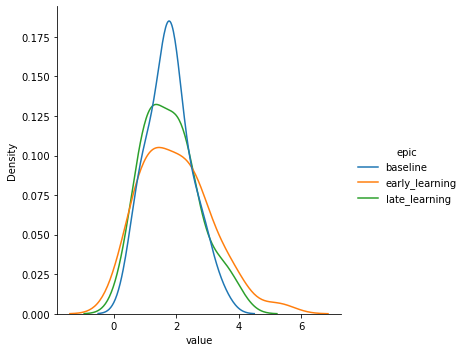

In [ ]:
sns.displot(
    x='value', hue='epic',
    data=df[
        (df.region_idx == 100) & (df.comp == 'ecc')
    ],
    kind='kde'
)

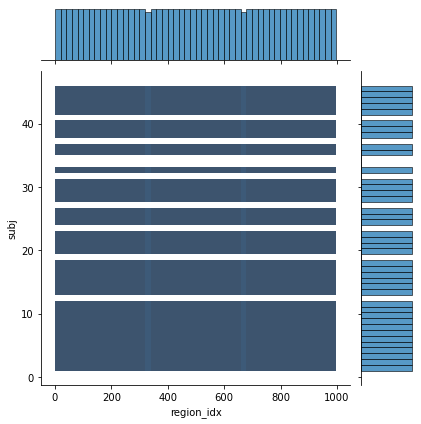

In [ ]:
sns.jointplot(
    x='region_idx', y='subj',
    data=df[df.comp == 'ecc'],
    kind='hist'
)

---

In [10]:
stats.ttest_ind([1,2,4], [4, 5])

Ttest_indResult(statistic=-1.8085816934646561, pvalue=0.16822899527384716)

In [15]:
stats.f_oneway([1,2,4], [4, 5], [23, 53, 6])

F_onewayResult(statistic=2.411747473267907, pvalue=0.18482467264369268)

---

In [16]:
df.groupby(['epic', 'indic']).value.mean()

epic      indic
baseline  ecc      2.749806e+00
          grad1   -2.346987e-17
          grad2   -3.659954e-18
          grad3    4.538788e-18
          grad4    1.183645e-17
early     ecc      2.960457e+00
          grad1   -7.279859e-17
          grad2   -5.775273e-17
          grad3   -2.990955e-17
          grad4    8.880116e-18
late      ecc      2.914213e+00
          grad1    5.572669e-18
          grad2    4.041245e-17
          grad3   -2.881240e-18
          grad4    4.278475e-17
Name: value, dtype: float64

In [11]:
rois = df.groupby(['epic', 'indic', 'roi']).value.apply(list).reset_index()
rois

,epic,indic,roi,value
0,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428..."
1,baseline,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270..."
2,baseline,ecc,2,"[2.232096057356207, 3.504821656370252, 3.89460..."
3,baseline,ecc,3,"[2.600396140943782, 1.659197246942436, 4.67765..."
4,baseline,ecc,4,"[2.093912173687403, 2.9646337560879377, 4.4966..."
...,...,...,...,...
14965,late,grad4,993,"[-0.4214530817058477, -1.3875244388004755, -2...."
14966,late,grad4,994,"[0.194128597438479, -1.001630205353598, -0.724..."
14967,late,grad4,995,"[-0.560670353660302, -1.0763102070249144, -1.2..."
14968,late,grad4,996,"[0.8191046970122979, -2.4008276785439144, -2.0..."


In [20]:
rois.groupby('roi').value.count()

roi
0      15
1      15
2      15
3      15
4      15
       ..
993    15
994    15
995    15
996    15
997    15
Name: value, Length: 998, dtype: int64

---
compare epics within a comp

In [49]:
rois

,epic,indic,roi,value
0,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428..."
1,baseline,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270..."
2,baseline,ecc,2,"[2.232096057356207, 3.504821656370252, 3.89460..."
3,baseline,ecc,3,"[2.600396140943782, 1.659197246942436, 4.67765..."
4,baseline,ecc,4,"[2.093912173687403, 2.9646337560879377, 4.4966..."
...,...,...,...,...
14965,late,grad4,993,"[-0.4214530817058477, -1.3875244388004755, -2...."
14966,late,grad4,994,"[0.194128597438479, -1.001630205353598, -0.724..."
14967,late,grad4,995,"[-0.560670353660302, -1.0763102070249144, -1.2..."
14968,late,grad4,996,"[0.8191046970122979, -2.4008276785439144, -2.0..."


In [50]:
11976 * 6

71856

In [51]:
rois.groupby(['indic','roi']).value.count()

indic  roi
ecc    0      3
       1      3
       2      3
       3      3
       4      3
             ..
grad4  993    3
       994    3
       995    3
       996    3
       997    3
Name: value, Length: 4990, dtype: int64

In [52]:
d1 = rois.merge(rois, on=['indic', 'roi'])

In [53]:
d1.shape[0] #* (9 - 3)

44910

In [54]:
d1

,epic_x,indic,roi,value_x,epic_y,value_y
0,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...",baseline,"[3.738823583537087, 1.7368981192979858, 1.0428..."
1,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...",early,"[1.4828515112597205, 1.9462027453800856, 1.571..."
2,baseline,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...",late,"[3.2978642478487115, 1.6320123924229435, 1.318..."
3,early,ecc,0,"[1.4828515112597205, 1.9462027453800856, 1.571...",baseline,"[3.738823583537087, 1.7368981192979858, 1.0428..."
4,early,ecc,0,"[1.4828515112597205, 1.9462027453800856, 1.571...",early,"[1.4828515112597205, 1.9462027453800856, 1.571..."
...,...,...,...,...,...,...
44905,early,grad4,997,"[-0.7199885757096268, -0.8758789834983767, -1....",early,"[-0.7199885757096268, -0.8758789834983767, -1...."
44906,early,grad4,997,"[-0.7199885757096268, -0.8758789834983767, -1....",late,"[0.6251946378245254, -2.0693332185314697, -2.0..."
44907,late,grad4,997,"[0.6251946378245254, -2.0693332185314697, -2.0...",baseline,"[1.167490242896826, -1.0584063616187314, -2.68..."
44908,late,grad4,997,"[0.6251946378245254, -2.0693332185314697, -2.0...",early,"[-0.7199885757096268, -0.8758789834983767, -1...."


In [55]:
35928 / 11976

3.0

In [56]:
d1[~(d1.epic_x == d1.epic_y)].shape[0]

29940

In [57]:
23952 + 11976

35928

In [58]:
d1 = d1[~(d1.epic_x == d1.epic_y)]

In [59]:
d1['pair'] = d1.apply(lambda r: r['epic_x'] + '__' + r['epic_y']
if (r['epic_x'] < r['epic_y'])
else r['epic_y'] + '__' + r['epic_x'], axis=1)

In [60]:
d1 = d1.drop_duplicates(['indic', 'roi', 'pair']).drop(['epic_x', 'epic_y'], axis=1)

In [61]:
d1

,indic,roi,value_x,value_y,pair
1,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...","[1.4828515112597205, 1.9462027453800856, 1.571...",baseline__early
2,ecc,0,"[3.738823583537087, 1.7368981192979858, 1.0428...","[3.2978642478487115, 1.6320123924229435, 1.318...",baseline__late
5,ecc,0,"[1.4828515112597205, 1.9462027453800856, 1.571...","[3.2978642478487115, 1.6320123924229435, 1.318...",early__late
10,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270...","[1.6264553230942744, 1.31225455764315, 3.87989...",baseline__early
11,ecc,1,"[1.606312658411211, 0.4964496197207039, 4.2270...","[3.671105939121064, 1.1826795772943928, 3.2401...",baseline__late
...,...,...,...,...,...
44894,grad4,996,"[-0.4754541431192363, -1.4953203668601391, -2....","[0.8191046970122979, -2.4008276785439144, -2.0...",baseline__late
44897,grad4,996,"[-0.1802052293059366, -1.237240360175787, -1.6...","[0.8191046970122979, -2.4008276785439144, -2.0...",early__late
44902,grad4,997,"[1.167490242896826, -1.0584063616187314, -2.68...","[-0.7199885757096268, -0.8758789834983767, -1....",baseline__early
44903,grad4,997,"[1.167490242896826, -1.0584063616187314, -2.68...","[0.6251946378245254, -2.0693332185314697, -2.0...",baseline__late


In [62]:
ALPHA = 0.05

In [63]:
d1['tstat'] = d1.apply(lambda x: stats.ttest_ind(x['value_x'], x['value_y']).statistic, axis=1)
d1['pvalue'] = d1.apply(lambda x: stats.ttest_ind(x['value_x'], x['value_y']).pvalue, axis=1)
d1['signif'] = d1.pvalue.apply(lambda x: 1 if x < ALPHA else 0)

In [64]:
d1 = d1.drop(['value_x', 'value_y'], axis=1)

In [65]:
d1

,indic,roi,pair,tstat,pvalue,signif
1,ecc,0,baseline__early,-0.444305,0.658053,0
2,ecc,0,baseline__late,-0.947098,0.346514,0
5,ecc,0,early__late,-0.440811,0.660569,0
10,ecc,1,baseline__early,-1.124894,0.264084,0
11,ecc,1,baseline__late,-0.886355,0.378151,0
...,...,...,...,...,...,...
44894,grad4,996,baseline__late,-2.472372,0.015599,1
44897,grad4,996,early__late,-0.467313,0.641579,0
44902,grad4,997,baseline__early,-0.038605,0.969304,0
44903,grad4,997,baseline__late,-0.546235,0.586463,0


In [66]:
# d1.to_csv('rois_pairwise_stats.csv', index=False)

---

plotting

In [69]:
surf_labels, mask_removed = load_atlas()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [70]:
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_yarg',
    'tstat': 'gist_yarg',
    'pvalue': 'gist_gray'
}

In [71]:
cmap = {'signif': 'bwr',
    'fstat': 'gist_heat',
    'tstat': 'gist_heat',
    'pvalue': 'gist_heat'
    # 'fstat': 'gist_yarg',
    # 'pvalue': 'gist_gray'
}

In [74]:
d1

,indic,roi,pair,tstat,pvalue,signif
1,ecc,0,baseline__early,-0.444305,0.658053,0
2,ecc,0,baseline__late,-0.947098,0.346514,0
5,ecc,0,early__late,-0.440811,0.660569,0
10,ecc,1,baseline__early,-1.124894,0.264084,0
11,ecc,1,baseline__late,-0.886355,0.378151,0
...,...,...,...,...,...,...
44894,grad4,996,baseline__late,-2.472372,0.015599,1
44897,grad4,996,early__late,-0.467313,0.641579,0
44902,grad4,997,baseline__early,-0.038605,0.969304,0
44903,grad4,997,baseline__late,-0.546235,0.586463,0


In [76]:
d1['tstat']

1       -0.444305
2       -0.947098
5       -0.440811
10      -1.124894
11      -0.886355
           ...   
44894   -2.472372
44897   -0.467313
44902   -0.038605
44903   -0.546235
44906   -0.573499
Name: tstat, Length: 14970, dtype: float64

In [78]:
statistics = ['signif']
indicators = ['ecc']

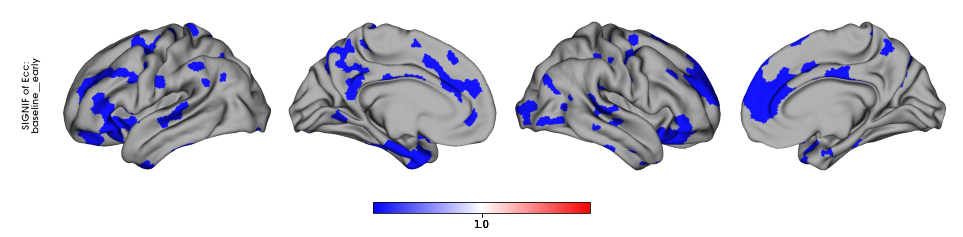

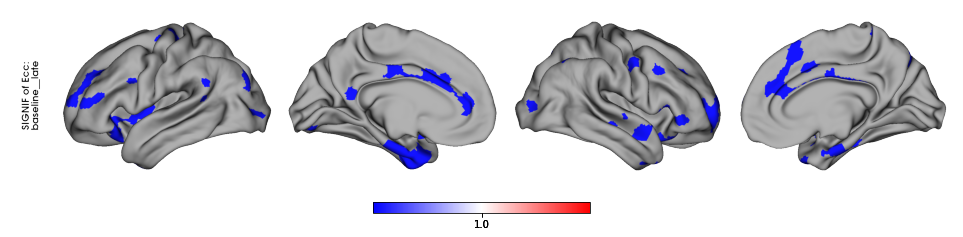

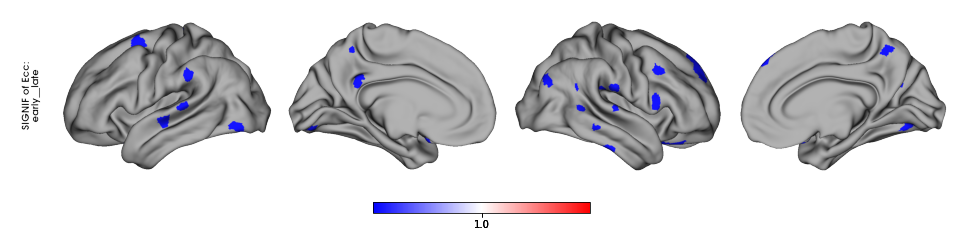

In [79]:
for c in indicators:
    for contrast in d1['pair'].unique():
        d = d1[(d1['indic'] == c)&(d1['pair'] == contrast)]
        for s in statistics:
            data = np.array(d[s])
            data = map_to_labels(data, surf_labels, mask=mask_removed)
            stack_surfplot(data, s.upper() + ' of ' + c.capitalize() + ':\n' + contrast, cmap[s], None)

---

In [80]:
# !pip install pingouin

In [81]:
import pingouin as pg

In [82]:
d3 = df.groupby('roi').apply(pg.rm_anova, dv='value', within='epic', subject='subj')

In [83]:
d3[d3['p-unc'] < .05]

,,Source,ddof1,ddof2,F,p-unc,np2,eps,p-GG-corr,sphericity,W-spher,p-spher
roi,,,,,,,,,,,,
4,0,epic,2,78,3.482735,0.035582,0.081980,0.969571,NaN,NaN,NaN,NaN
24,0,epic,2,78,4.649412,0.012370,0.106517,0.987458,NaN,NaN,NaN,NaN
40,0,epic,2,78,3.896889,0.024373,0.090843,0.926335,NaN,NaN,NaN,NaN
41,0,epic,2,78,4.084984,0.020550,0.094812,0.963592,NaN,NaN,NaN,NaN
47,0,epic,2,78,5.446506,0.006107,0.122541,0.898733,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
993,0,epic,2,78,4.430629,0.015048,0.102016,0.741283,0.025553,False,0.650987,0.000287
994,0,epic,2,78,6.268619,0.002988,0.138476,0.957092,NaN,NaN,NaN,NaN
995,0,epic,2,78,11.074215,0.000058,0.221156,0.944920,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='F', ylabel='Count'>

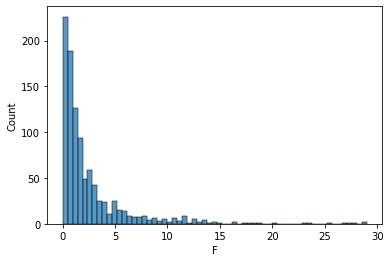

In [87]:
import seaborn as sns

sns.histplot(d3['F'])

In [85]:
d3

,,Source,ddof1,ddof2,F,p-unc,np2,eps,p-GG-corr,sphericity,W-spher,p-spher
roi,,,,,,,,,,,,
0,0,epic,2,78,1.109140,0.334988,0.027653,0.878856,NaN,NaN,NaN,NaN
1,0,epic,2,78,0.373932,0.689250,0.009497,0.809482,0.645033,False,0.764642,0.006105
2,0,epic,2,78,0.975087,0.381709,0.024392,0.880497,NaN,NaN,NaN,NaN
3,0,epic,2,78,0.690978,0.504127,0.017409,0.916918,NaN,NaN,NaN,NaN
4,0,epic,2,78,3.482735,0.035582,0.081980,0.969571,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
993,0,epic,2,78,4.430629,0.015048,0.102016,0.741283,0.025553,False,0.650987,0.000287
994,0,epic,2,78,6.268619,0.002988,0.138476,0.957092,NaN,NaN,NaN,NaN
995,0,epic,2,78,11.074215,0.000058,0.221156,0.944920,NaN,NaN,NaN,NaN


---
to plot

In [ ]:
surf_labels, mask_removed = load_atlas()

from brainspace.datasets import load_conte69

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


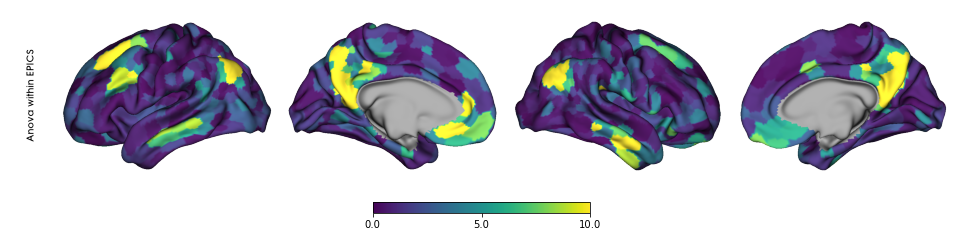

In [88]:
# for anova's F value
data_range = (0, 10)

data = np.array(d3['F'])
data = map_to_labels(data, surf_labels, mask=mask_removed)
stack_surfplot(data, 'Anova within EPICS', 'viridis', data_range)

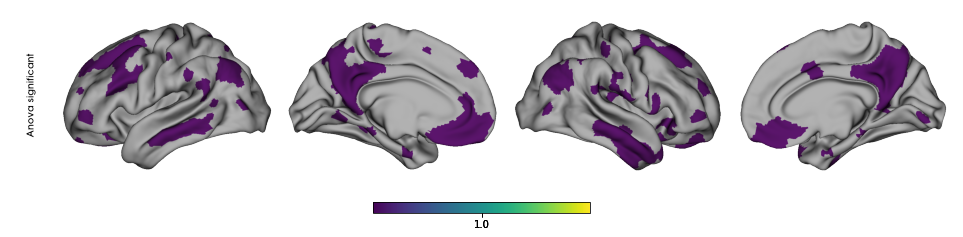

In [90]:
data = np.array(
    d3['p-unc'].apply(lambda x: 1 if x < ALPHA else 0)
)

data = map_to_labels(data, surf_labels, mask=mask_removed)
stack_surfplot(data, 'Anova significant' , 'viridis', None)

In [ ]:
# pg.pairwise_ttests(dv='dv', within=['iv1', 'iv2'], subject='id', data=df)

In [32]:
df

,roi,value,subj,epic,indic
0,0,-0.774317,1,baseline,grad1
1,1,-1.407623,1,baseline,grad1
2,2,-1.905399,1,baseline,grad1
3,3,-1.225759,1,baseline,grad1
4,4,-0.971639,1,baseline,grad1
...,...,...,...,...,...
598795,993,1.497172,46,late,ecc
598796,994,2.645587,46,late,ecc
598797,995,0.922904,46,late,ecc
598798,996,2.302812,46,late,ecc


In [ ]:
# dv : Value
# within epic

In [100]:
len(rois.loc[0, 'value'])

40

In [91]:
d2 = rois.groupby(['indic', 'roi']).value.apply(list).reset_index()

In [92]:
3992 / 998

4.0

In [93]:
d2

,indic,roi,value
0,ecc,0,"[[3.738823583537087, 1.7368981192979858, 1.042..."
1,ecc,1,"[[1.606312658411211, 0.4964496197207039, 4.227..."
2,ecc,2,"[[2.232096057356207, 3.504821656370252, 3.8946..."
3,ecc,3,"[[2.600396140943782, 1.659197246942436, 4.6776..."
4,ecc,4,"[[2.093912173687403, 2.9646337560879377, 4.496..."
...,...,...,...
4985,grad4,993,"[[0.2228766568761176, -0.9569710751310332, -2...."
4986,grad4,994,"[[0.4264164940723961, -0.756922275354087, -1.0..."
4987,grad4,995,"[[-0.5721485988006674, -1.0172784576514624, -1..."
4988,grad4,996,"[[-0.4754541431192363, -1.4953203668601391, -2..."


In [36]:
len(d2.loc[0, 'value'])

3

In [94]:
d2['fstat'] = d2.value.apply(lambda x: stats.f_oneway(*x).statistic)
d2['pvalue'] = d2.value.apply(lambda x: stats.f_oneway(*x).pvalue)

ALPHA = 0.05
d2['signif'] = d2.pvalue.apply(lambda x: 1 if x < ALPHA else 0)

In [95]:
d2 = d2.drop('value', axis=1)

In [96]:
d2

,indic,roi,fstat,pvalue,signif
0,ecc,0,0.408893,0.665331,0
1,ecc,1,0.747181,0.475947,0
2,ecc,2,0.519728,0.596048,0
3,ecc,3,0.059077,0.942663,0
4,ecc,4,0.173517,0.840919,0
...,...,...,...,...,...
4985,grad4,993,2.180296,0.117579,0
4986,grad4,994,0.119942,0.887081,0
4987,grad4,995,2.071467,0.130597,0
4988,grad4,996,3.372169,0.037683,1


In [97]:
# d2.to_csv('rois_anova_stats.csv', index=False)

---
plotting

In [41]:
statistics = ['signif']
# indicators = ['ecc', 'grad4']
indicators = d2.indic.unique()

In [42]:
cmap = {'signif': 'gist_heat',
    'fstat': 'gist_heat',
    'pvalue': 'gist_heat'
    # 'fstat': 'gist_yarg',
    # 'pvalue': 'gist_gray'
}

In [99]:
for c in indicators:
    d = d2[d2['indic'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        # stack_surfplot(data, 'Anova ' + s.upper() + '\n of ' + c.capitalize(), cmap[s], None)

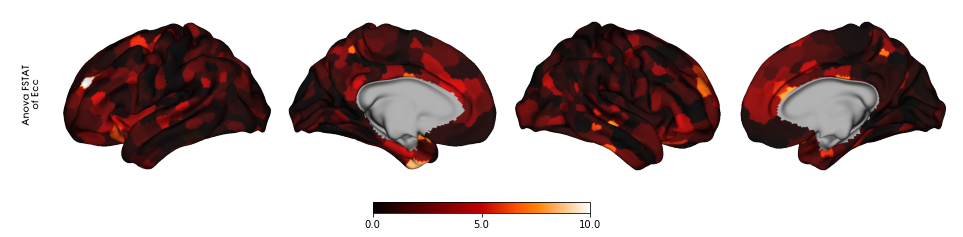

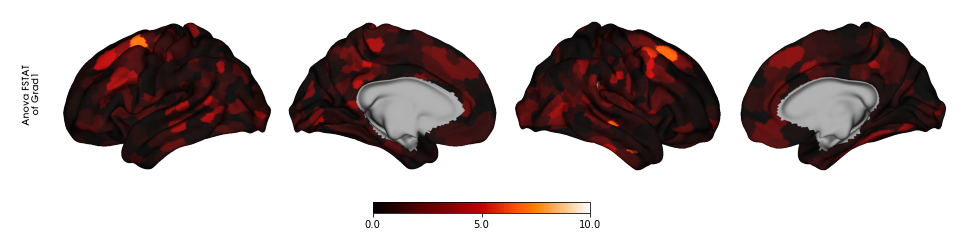

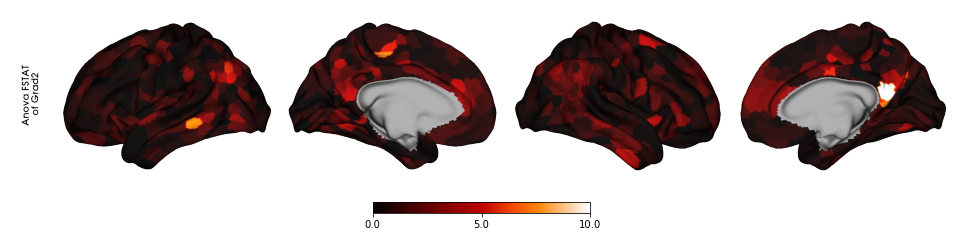

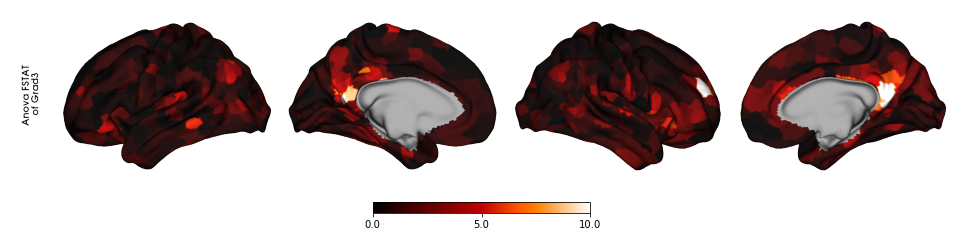

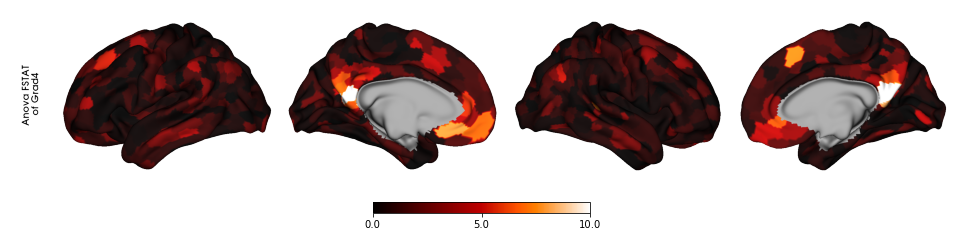

In [100]:
statistics = ['fstat']
indicators = d2.indic.unique()
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'pvalue': 'gist_gray'
}
data_range = {
    'fstat': (0, 10)
}

for c in indicators:
    d = d2[d2['indic'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        stack_surfplot(data, 'Anova ' + s.upper() + '\n of ' + c.capitalize(), cmap[s], data_range[s])

---
debugging atlas

In [ ]:
mask_removed

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
mask_removed.shape

(20484,)

In [ ]:
from brainspace.datasets import load_group_fc, load_parcellation, load_conte69


In [ ]:

# First load mean connectivity matrix and Schaefer parcellation
conn_matrix = load_group_fc('schaefer', scale=400)
labeling = load_parcellation('schaefer', scale=400, join=True)

# and load the conte69 surfaces
surf_lh, surf_rh = load_conte69()

In [ ]:
mask_removed.sum()

18723

In [ ]:
surf_labels.shape

(20484,)

In [ ]:
np.unique(surf_labels).shape

(1001,)

In [ ]:
surf = load_conte69()

In [ ]:
import nibabel as nib

In [ ]:
fname = 'Schaefer2018_1000Parcels_7Networks_order.dlabel.nii'

In [ ]:
v = nib.load(fname).get_fdata()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [ ]:
p = Plot(surf[0], surf[1])

In [ ]:
p.add_layer(v.ravel())

In [ ]:
p.add_layer(v.ravel() != 0)

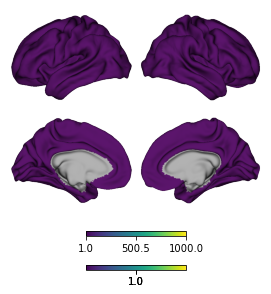

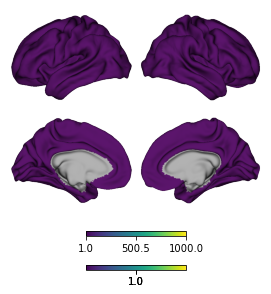

In [ ]:
p.build()

debug went to another notebook

---